In [1]:
import pandas as pd
import numpy as np
import subprocess
import json
import ast

import matplotlib.pyplot as plt

#from MoNA_reader import process_json_file
from MoNA_reader import *#process_json_file as process_json_file_test, read_line
from spectra_plotting import *

In [2]:
csv_pth = "data/MoNA/"

In [3]:

df = pd.read_csv('data/MoNA/in-silico.csv') 
df2 = pd.read_csv('data/GNPS/ALL_GNPS_cleaned.csv')

/tmp/ipykernel_83597/3359628740.py:11: DtypeWarning: Columns (6,7,10,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/MoNA/in-silico.csv')
/tmp/ipykernel_83597/3359628740.py:12: DtypeWarning: Columns (4,13,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv('data/GNPS/ALL_GNPS_cleaned.csv')


In [4]:
df

,Unnamed: 0,kind,name,molecular_formula,SMILES,pubchem_cid,InChI,InChIKey,total_exact_mass,exact_mass,instrument,instrument_type,ms_level,ionization,ionization_mode,spectrum,score
0,0,biological,"2,3,5-Trimethyl-1H-indole, TMS derivative",C14H21NSi,C1=CC2=C(C=C1C)C(=C(N2[Si](C)(C)C)C)C,NaN,InChI=1S/C14H21NSi/c1-10-7-8-14-13(9-10)11(2)1...,KHKJMJPOXGEQGW-UHFFFAOYSA-N,231.144326,NaN,NaN,NaN,MS1,NaN,positive,"[(15.0, 0.4), (27.0, 5.7), (28.0, 6.8), (29.0,...",3.571429
1,1,biological,"Ethyl 3-hydroxy-3-methylpentanoate, TMS deriva...",C11H24O3Si,O=C(OCC)CC(O[Si](C)(C)C)(C)CC,NaN,"InChI=1S/C11H24O3Si/c1-7-11(3,14-15(4,5)6)9-10...",FGZVHXCJVPTHKF-UHFFFAOYSA-N,232.149471,NaN,NaN,NaN,MS1,NaN,positive,"[(15.0, 5.4), (16.0, 0.2), (27.0, 9.7), (28.0,...",3.571429
2,2,biological,"L-Valine, TMS derivative",C8H19NO2Si,O=C(O[Si](C)(C)C)C(N)C(C)C,NaN,"InChI=1S/C8H19NO2Si/c1-6(2)7(9)8(10)11-12(3,4)...",IJGIMCZHMYSSHY-ZETCQYMHSA-N,189.118505,NaN,NaN,NaN,MS1,NaN,positive,"[(15.0, 4.9), (28.0, 0.1), (42.0, 0.1), (43.0,...",3.571429
3,3,biological,"Methyl 3-hydroxybutyrate, TMS derivative",C8H18O3Si,O=C(OC)CC(O[Si](C)(C)C)C,NaN,"InChI=1S/C8H18O3Si/c1-7(6-8(9)10-2)11-12(3,4)5...",FHDCVPMIQWHEAE-UHFFFAOYSA-N,190.102521,NaN,NaN,NaN,MS1,NaN,positive,"[(15.0, 41.0), (16.0, 0.4), (27.0, 4.0), (28.0...",3.571429
4,4,biological,"1-Butanol, TMS derivative",C7H18OSi,O(CCCC)[Si](C)(C)C,NaN,"InChI=1S/C7H18OSi/c1-5-6-7-8-9(2,3)4/h5-7H2,1-4H3",YTJUXOIAXOQWBV-UHFFFAOYSA-N,146.112692,NaN,NaN,NaN,MS1,NaN,positive,"[(15.0, 10.8), (16.0, 0.1), (27.0, 7.6), (28.0...",3.571429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1844347,1844347,In-Silico,7-MAHMA,C28H54O4,O=C(O)CCCCCC(OC(=O)CCCCCCCCCCCCC)CCCCCCC,NaN,InChI=1S/C28H54O4/c1-3-5-7-9-10-11-12-13-14-16...,NaN,454.402210,453.394385,NaN,NaN,MS2,NaN,negative,"[(243.19602, 12.612613), (227.20111, 100.0), (...",4.444444
1844348,1844348,In-Silico,6-MAHMA,C28H54O4,O=C(O)CCCCC(OC(=O)CCCCCCCCCCCCC)CCCCCCCC,NaN,InChI=1S/C28H54O4/c1-3-5-7-9-11-12-13-14-15-17...,NaN,454.402210,453.394385,NaN,NaN,MS2,NaN,negative,"[(243.19602, 12.612613), (227.20111, 100.0), (...",4.444444
1844349,1844349,In-Silico,5-MAHMA,C28H54O4,O=C(O)CCCC(OC(=O)CCCCCCCCCCCCC)CCCCCCCCC,NaN,InChI=1S/C28H54O4/c1-3-5-7-9-11-12-13-14-16-18...,NaN,454.402210,453.394385,NaN,NaN,MS2,NaN,negative,"[(243.19602, 12.612613), (227.20111, 100.0), (...",4.444444
1844350,1844350,In-Silico,4-MAHMA,C28H54O4,O=C(O)CCC(OC(=O)CCCCCCCCCCCCC)CCCCCCCCCC,NaN,InChI=1S/C28H54O4/c1-3-5-7-9-11-13-14-15-17-19...,NaN,454.402210,453.394385,NaN,NaN,MS2,NaN,negative,"[(243.19602, 12.612613), (227.20111, 100.0), (...",4.444444


In [5]:
df2

,scan,spectrum_id,collision_energy,Adduct,Compound_Source,Compund_Name,Precursor_MZ,ExactMass,Charge,Ion_Mode,Smiles,INCHI,InChIKey_smiles,msManufacturer,msMassAnalyzer,msIonisation,msDissociationMethod,GNPS_library_membership,ppmBetweenExpAndThMass
0,1,CCMSLIB00000001547,NaN,[M+H]1+,isolated,3-Des-Microcystein_LR,981.5400,980.533118,1,positive,CC(C=CC1NC(=O)C(CCCN=C(N)N)NC(=O)C(C)C(C(=O)O)...,InChI=1S/C48H72N10O12/c1-25(2)22-36-45(66)57-3...,UYJGHPVHCMVZPP-UHFFFAOYSA-N,NaN,qtof,ESI,NaN,GNPS-LIBRARY,0.406263
1,2,CCMSLIB00000001548,NaN,[M+H]1+,isolated,Hoiamide B,940.2500,939.451957,1,positive,CCCC(C)C(O)C(C)C1OC(=O)C(C(C)O)NC(=O)C(C(C)CC)...,InChI=1S/C45H73N5O10S3/c1-14-17-24(6)34(52)26(...,KNGPFNUOXXLKCN-UHFFFAOYSA-N,NaN,qtof,ESI,NaN,GNPS-LIBRARY,222.483646
2,3,CCMSLIB00000001549,NaN,[M+H]1+,isolated,Malyngamide C,456.1000,455.243851,1,positive,CCCCCCCC(CC=CCCC(=O)NCC(=CCl)C12OC1C(O)CCC2=O)OC,InChI=1S/C24H38ClNO5/c1-3-4-5-6-8-11-19(30-2)1...,WXDBUBIFYCCNLE-UHFFFAOYSA-N,NaN,qtof,ESI,NaN,GNPS-LIBRARY,331.235723
3,4,CCMSLIB00000001550,NaN,[M+H]1+,isolated,Scytonemin,545.0000,544.142307,1,positive,O=C1C(=Cc2ccc(O)cc2)C2=Nc3ccccc3C2=C1C1=C2C(=N...,InChI=1S/C36H20N2O4/c39-21-13-9-19(10-14-21)17...,CGZKSPLDUIRCIO-UHFFFAOYSA-N,NaN,ion trap,ESI,NaN,GNPS-LIBRARY,274.392751
4,5,CCMSLIB00000001551,NaN,[M+H]1+,isolated,Salinisporamide A,314.1160,NaN,1,positive,NaN,NaN,NaN,NaN,qtof,ESI,NaN,GNPS-LIBRARY,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
542772,542773,MSBNK-BAFG-CSL23111017255,50.0,[M-H]1-,NaN,Fludioxonil,247.0324,248.039734,-1,negative,N#Cc1c[nH]cc1-c1cccc2c1OC(F)(F)O2,InChI=1S/C12H6F2N2O2/c13-12(14)17-10-3-1-2-8(1...,MUJOIMFVNIBMKC-UHFFFAOYSA-N,NaN,qtof,ESI,cid,MassBank_ML_Export,0.235056
542773,542774,MSBNK-BAFG-CSL23111017256,40.0,[M-H]1-,NaN,Fludioxonil,247.0324,248.039734,-1,negative,N#Cc1c[nH]cc1-c1cccc2c1OC(F)(F)O2,InChI=1S/C12H6F2N2O2/c13-12(14)17-10-3-1-2-8(1...,MUJOIMFVNIBMKC-UHFFFAOYSA-N,NaN,qtof,ESI,cid,MassBank_ML_Export,0.235056
542774,542775,MSBNK-BAFG-CSL23111017257,60.0,[M-H]1-,NaN,Fludioxonil,247.0324,248.039734,-1,negative,N#Cc1c[nH]cc1-c1cccc2c1OC(F)(F)O2,InChI=1S/C12H6F2N2O2/c13-12(14)17-10-3-1-2-8(1...,MUJOIMFVNIBMKC-UHFFFAOYSA-N,NaN,qtof,ESI,cid,MassBank_ML_Export,0.235056
542775,542776,MSBNK-BAFG-CSL23111017258,150.0,[M-H]1-,NaN,Fludioxonil,247.0324,248.039734,-1,negative,N#Cc1c[nH]cc1-c1cccc2c1OC(F)(F)O2,InChI=1S/C12H6F2N2O2/c13-12(14)17-10-3-1-2-8(1...,MUJOIMFVNIBMKC-UHFFFAOYSA-N,NaN,qtof,ESI,cid,MassBank_ML_Export,0.235056


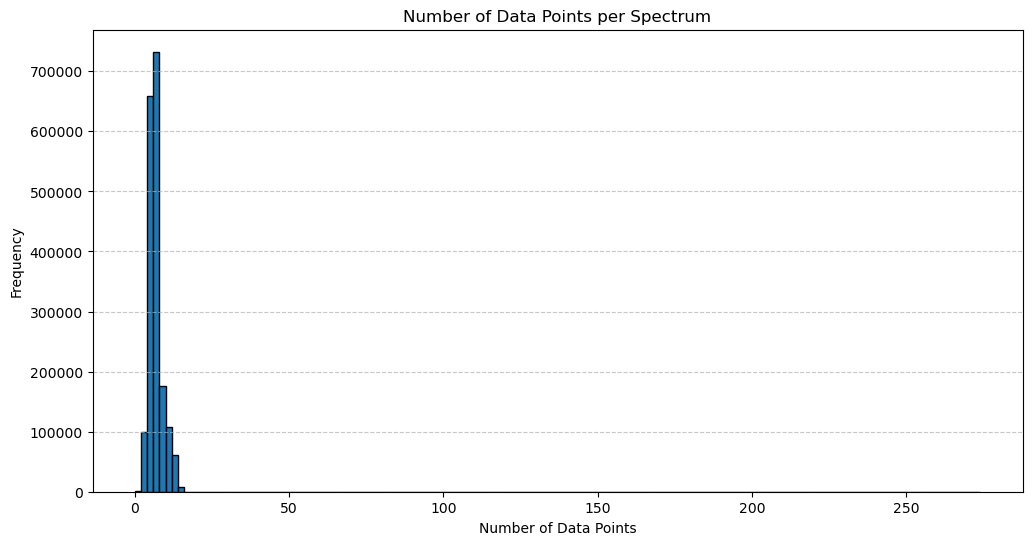

Total spectra: 1844352
Min values: 1
Max values: 273
Mean values: 6.30
Median values: 6.00


In [6]:
spectrum_counts = plot_spectrum_length_histogram(df, 'spectrum', 2)

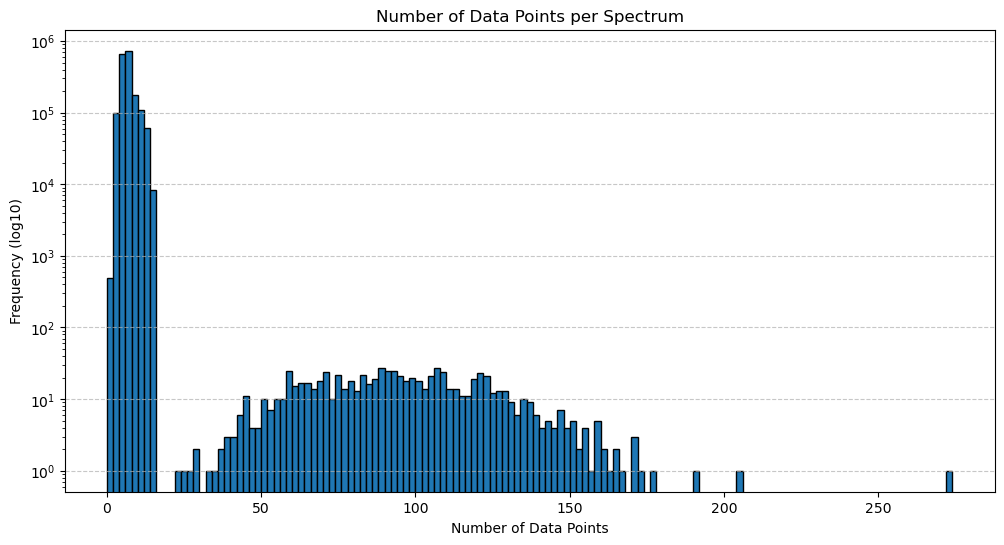

Total spectra: 1844352
Min values: 1
Max values: 273
Mean values: 6.30
Median values: 6.00


In [7]:
spectrum_counts = plot_spectrum_length_histogram(df, 'spectrum', 2, 'log')

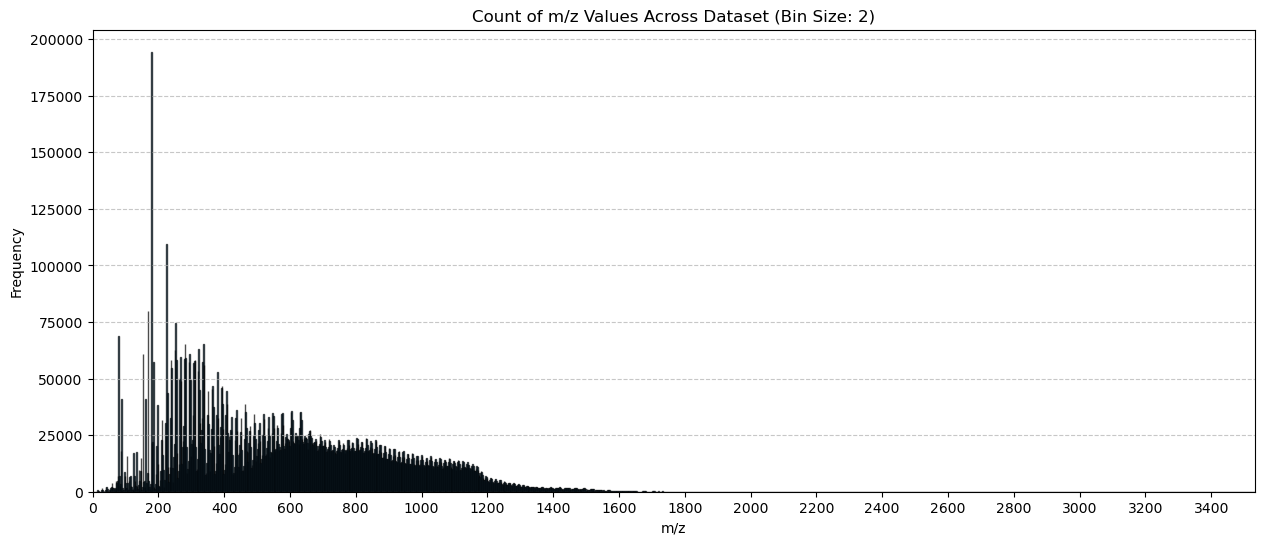

Total m/z values: 11627634
Min m/z: 13.00
Max m/z: 3532.73
Mean m/z: 601.03
Median m/z: 566.52


In [8]:
all_mz_values = plot_mz_histogram(df, spectrum_column='spectrum', bin_size=2, min_mz=0, max_mz=None)

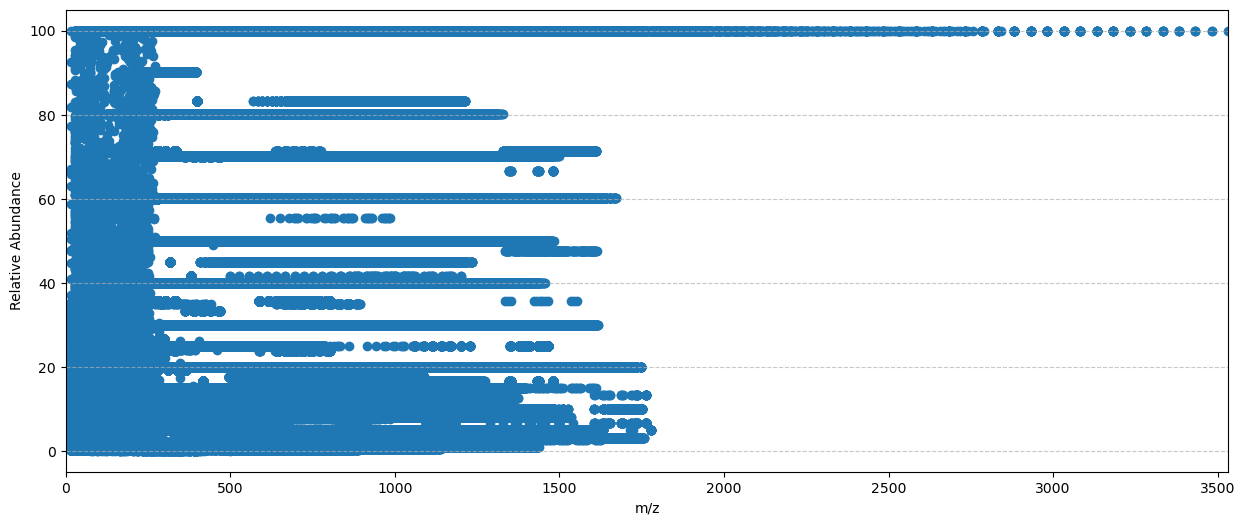

Total data points: 11627634
Min m/z: 13.00
Max m/z: 3532.73
Mean m/z: 601.03
Median m/z: 566.52
Min abundance: 0.01
Max abundance: 100.00
Mean abundance: 33.72
Median abundance: 20.02


In [5]:
plot_all_abundance(df, spectrum_column='spectrum')

In [34]:
df.kind.value_counts()

kind
biological    1354267
In-Silico      490085
Name: count, dtype: int64

In [43]:
len(df.molecular_formula.unique())

19868

In [14]:
len(df.spectrum)

1844352

In [13]:
len(df.spectrum.unique())

1336342

In [52]:
df.spectrum[0].strip()

'[(15.0, 0.4), (27.0, 5.7), (28.0, 6.8), (29.0, 2.8), (30.0, 0.3), (31.0, 0.9), (38.0, 0.5), (39.0, 2.7), (40.0, 2.9), (41.0, 6.7), (42.0, 0.6), (43.0, 42.7), (44.0, 4.4), (45.0, 3.7), (46.0, 0.3), (47.0, 0.1), (51.0, 1.4), (52.0, 5.6), (53.0, 13.0), (54.0, 2.8), (55.0, 2.0), (56.0, 2.9), (57.0, 21.7), (58.0, 49.0), (59.0, 9.6), (60.0, 2.1), (61.0, 0.2), (62.0, 0.3), (63.0, 3.1), (64.0, 2.7), (65.0, 4.6), (66.0, 2.3), (67.0, 2.3), (68.0, 0.9), (69.0, 3.2), (70.0, 3.4), (71.0, 1.9), (72.0, 6.3), (73.0, 29.0), (74.0, 2.9), (75.0, 3.1), (76.0, 3.3), (77.0, 9.3), (78.0, 3.8), (79.0, 4.3), (80.0, 1.1), (81.0, 0.8), (82.0, 0.7), (83.0, 1.3), (84.0, 0.8), (85.0, 0.4), (87.0, 0.6), (88.0, 3.1), (89.0, 3.3), (90.0, 5.6), (91.0, 3.5), (92.0, 2.2), (93.0, 2.3), (94.0, 0.9), (95.0, 1.0), (96.0, 0.6), (99.0, 0.7), (100.0, 0.9), (101.0, 3.5), (102.0, 2.2), (103.0, 2.8), (104.0, 4.9), (105.0, 4.4), (106.0, 1.7), (107.0, 1.6), (108.0, 1.5), (109.0, 0.4), (112.0, 0.2), (113.0, 0.6), (114.0, 1.9), (115.

In [ ]:
x_arr = df.spectrum[0]

In [23]:
df.spectrum

0          [(15.0, 0.4), (27.0, 5.7), (28.0, 6.8), (29.0,...
1          [(15.0, 5.4), (16.0, 0.2), (27.0, 9.7), (28.0,...
2          [(15.0, 4.9), (28.0, 0.1), (42.0, 0.1), (43.0,...
3          [(15.0, 41.0), (16.0, 0.4), (27.0, 4.0), (28.0...
4          [(15.0, 10.8), (16.0, 0.1), (27.0, 7.6), (28.0...
                                 ...                        
1844347    [(243.19602, 12.612613), (227.20111, 100.0), (...
1844348    [(243.19602, 12.612613), (227.20111, 100.0), (...
1844349    [(243.19602, 12.612613), (227.20111, 100.0), (...
1844350    [(243.19602, 12.612613), (227.20111, 100.0), (...
1844351    [(243.19602, 12.612613), (227.20111, 100.0), (...
Name: spectrum, Length: 1844352, dtype: object

In [21]:
df['spectrum'].apply()

dtype('O')

In [5]:
pd.read_csv(csv_pth)

/tmp/ipykernel_1896/19321019.py:1: DtypeWarning: Columns (4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  pd.read_csv(csv_pth)


,kind,name,molecular_formula,pubchem_cid,InChI,InChIKey,total_exact_mass,exact_mass,instrument,instrument_type,ms_level,ionization,ionization_mode,spectrum,score
0,biological,"2,3,5-Trimethyl-1H-indole, TMS derivative",C14H21NSi,NaN,InChI=1S/C14H21NSi/c1-10-7-8-14-13(9-10)11(2)1...,KHKJMJPOXGEQGW-UHFFFAOYSA-N,231.144326,NaN,NaN,NaN,MS1,NaN,positive,"[(15.0, 0.4), (27.0, 5.7), (28.0, 6.8), (29.0,...",3.571429
1,biological,"Ethyl 3-hydroxy-3-methylpentanoate, TMS deriva...",C11H24O3Si,NaN,"InChI=1S/C11H24O3Si/c1-7-11(3,14-15(4,5)6)9-10...",FGZVHXCJVPTHKF-UHFFFAOYSA-N,232.149471,NaN,NaN,NaN,MS1,NaN,positive,"[(15.0, 5.4), (16.0, 0.2), (27.0, 9.7), (28.0,...",3.571429
2,biological,"L-Valine, TMS derivative",C8H19NO2Si,NaN,"InChI=1S/C8H19NO2Si/c1-6(2)7(9)8(10)11-12(3,4)...",IJGIMCZHMYSSHY-ZETCQYMHSA-N,189.118505,NaN,NaN,NaN,MS1,NaN,positive,"[(15.0, 4.9), (28.0, 0.1), (42.0, 0.1), (43.0,...",3.571429
3,biological,"Methyl 3-hydroxybutyrate, TMS derivative",C8H18O3Si,NaN,"InChI=1S/C8H18O3Si/c1-7(6-8(9)10-2)11-12(3,4)5...",FHDCVPMIQWHEAE-UHFFFAOYSA-N,190.102521,NaN,NaN,NaN,MS1,NaN,positive,"[(15.0, 41.0), (16.0, 0.4), (27.0, 4.0), (28.0...",3.571429
4,biological,"1-Butanol, TMS derivative",C7H18OSi,NaN,"InChI=1S/C7H18OSi/c1-5-6-7-8-9(2,3)4/h5-7H2,1-4H3",YTJUXOIAXOQWBV-UHFFFAOYSA-N,146.112692,NaN,NaN,NaN,MS1,NaN,positive,"[(15.0, 10.8), (16.0, 0.1), (27.0, 7.6), (28.0...",3.571429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230539,In-Silico,Cer-EODS d61:4,C61H113NO5,NaN,NaN,NaN,939.861876,938.85460,SCIEX 5600,NaN,MS2,NaN,negative,"[(267.2693, 5.005005), (321.2799, 100.0), (322...",4.500000
230540,In-Silico,Cer-EODS d61:3,C61H115NO5,NaN,NaN,NaN,941.877526,940.87025,SCIEX 5600,NaN,MS2,NaN,negative,"[(267.2693, 5.005005), (321.2799, 100.0), (324...",4.500000
230541,In-Silico,Cer-EODS d61:2,C61H117NO5,NaN,NaN,NaN,943.893176,942.88590,SCIEX 5600,NaN,MS2,NaN,negative,"[(267.2693, 5.005005), (321.2799, 100.0), (326...",4.500000
230542,In-Silico,Cer-EODS d60:3,C60H113NO5,NaN,NaN,NaN,927.861876,926.85460,SCIEX 5600,NaN,MS2,NaN,negative,"[(267.2693, 5.005005), (310.2751, 5.005005), (...",4.500000
